## Aircrash investigation Project

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline
Data = pd.read_csv('aircrash1908-2008.csv')

In [35]:
Data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,09/09/1913 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [36]:
obs,feat=Data.shape

In [37]:
obs,feat

(5268, 13)

In [38]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


In [39]:
Data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,05/20/2009 06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,05/26/2009 00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,06/01/2009 00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,06/07/2009 08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,06/08/2009 00:00,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


In [40]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            5268 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [41]:
Data.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [42]:
Data['Time'].replace(np.nan, '00:00') 

0       09/17/1908 17:18
1       07/12/1912 06:30
2       08/06/1913 00:00
3       09/09/1913 18:30
4       10/17/1913 10:30
5       03/05/1915 01:00
6       09/03/1915 15:20
7       07/28/1916 00:00
8       09/24/1916 01:00
9       10/01/1916 23:45
10      11/21/1916 00:00
11      11/28/1916 23:45
12      03/04/1917 00:00
13      03/30/1917 00:00
14      05/14/1917 05:15
15      06/14/1917 08:45
16      08/21/1917 07:00
17      10/20/1917 07:45
18      04/07/1918 21:30
19      05/10/1918 00:00
20      08/11/1918 10:00
21      12/16/1918 00:00
22      05/25/1919 00:00
23      07/19/1919 00:00
24      10/02/1919 00:00
25      10/14/1919 00:00
26      10/20/1919 00:00
27      10/30/1919 00:00
28      03/10/1920 00:00
29      03/30/1920 00:00
              ...       
5238    11/13/2008 11:35
5239    11/16/2008 10:32
5240    11/27/2008 17:00
5241    12/03/2008 12:13
5242    12/11/2008 06:25
5243    12/15/2008 16:40
5244    01/04/2009 15:30
5245    01/15/2009 15:06
5246    02/07/2009 14:00


In [43]:
Data['Date']

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
5       03/05/1915
6       09/03/1915
7       07/28/1916
8       09/24/1916
9       10/01/1916
10      11/21/1916
11      11/28/1916
12      03/04/1917
13      03/30/1917
14      05/14/1917
15      06/14/1917
16      08/21/1917
17      10/20/1917
18      04/07/1918
19      05/10/1918
20      08/11/1918
21      12/16/1918
22      05/25/1919
23      07/19/1919
24      10/02/1919
25      10/14/1919
26      10/20/1919
27      10/30/1919
28      03/10/1920
29      03/30/1920
           ...    
5238    11/13/2008
5239    11/16/2008
5240    11/27/2008
5241    12/03/2008
5242    12/11/2008
5243    12/15/2008
5244    01/04/2009
5245    01/15/2009
5246    02/07/2009
5247    02/07/2009
5248    02/12/2009
5249    02/15/2009
5250    02/20/2009
5251    02/25/2009
5252    03/09/2009
5253    03/12/2009
5254    03/22/2009
5255    03/23/2009
5256    04/01/2009
5257    04/06/2009
5258    04/09/2009
5259    04/1

In [44]:
Data['Time'].replace(np.nan, '00:00')

0       09/17/1908 17:18
1       07/12/1912 06:30
2       08/06/1913 00:00
3       09/09/1913 18:30
4       10/17/1913 10:30
5       03/05/1915 01:00
6       09/03/1915 15:20
7       07/28/1916 00:00
8       09/24/1916 01:00
9       10/01/1916 23:45
10      11/21/1916 00:00
11      11/28/1916 23:45
12      03/04/1917 00:00
13      03/30/1917 00:00
14      05/14/1917 05:15
15      06/14/1917 08:45
16      08/21/1917 07:00
17      10/20/1917 07:45
18      04/07/1918 21:30
19      05/10/1918 00:00
20      08/11/1918 10:00
21      12/16/1918 00:00
22      05/25/1919 00:00
23      07/19/1919 00:00
24      10/02/1919 00:00
25      10/14/1919 00:00
26      10/20/1919 00:00
27      10/30/1919 00:00
28      03/10/1920 00:00
29      03/30/1920 00:00
              ...       
5238    11/13/2008 11:35
5239    11/16/2008 10:32
5240    11/27/2008 17:00
5241    12/03/2008 12:13
5242    12/11/2008 06:25
5243    12/15/2008 16:40
5244    01/04/2009 15:30
5245    01/15/2009 15:06
5246    02/07/2009 14:00


In [45]:
#cleaning up

def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper()

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [46]:
accser=Data.groupby(Data.Time.dt.year)[['Date']].count()
accser.head()
accser[accser.index==1972]

,Date
Time,
1972,104


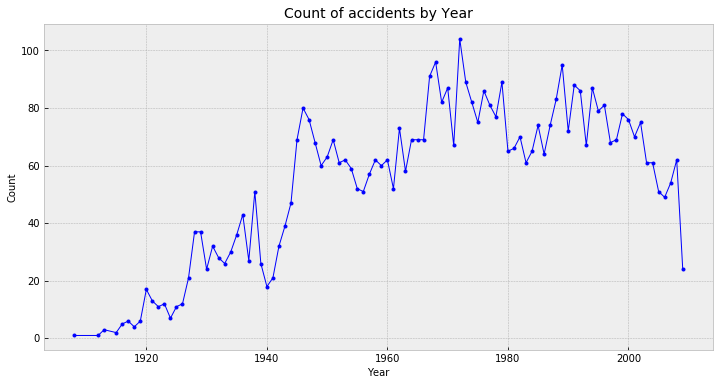

In [47]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

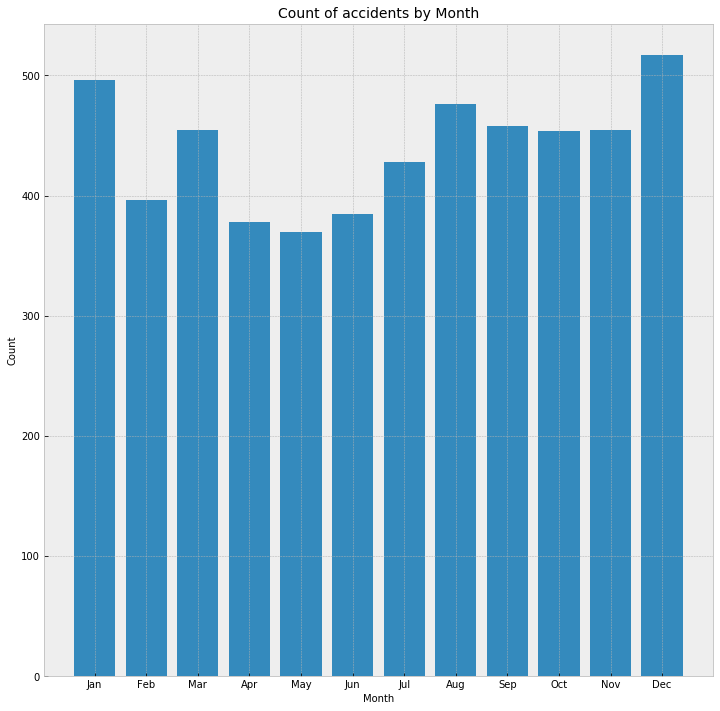

In [48]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


plt.figure(figsize=(12,12))

plt.bar(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count())
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count of accidents by Month', loc='Center', fontsize=14)
plt.show()

Text(0.5,1,'Count of accidents by Day of Week')

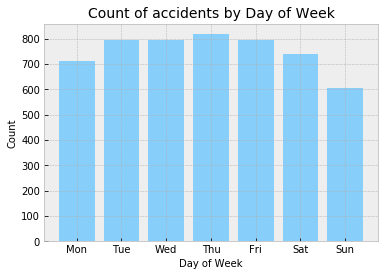

In [49]:
ax = pl.plot()
plt.bar(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

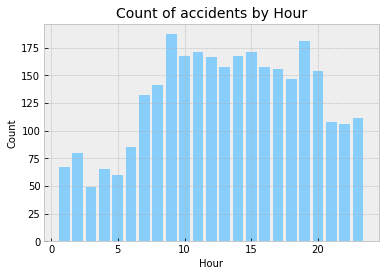

In [50]:
ax = pl.plot()
plt.bar(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)

plt.show()

In [51]:
Temp = Data.copy()

Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')

Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Text(0.5,1,'Total number of accidents by Type of flight')

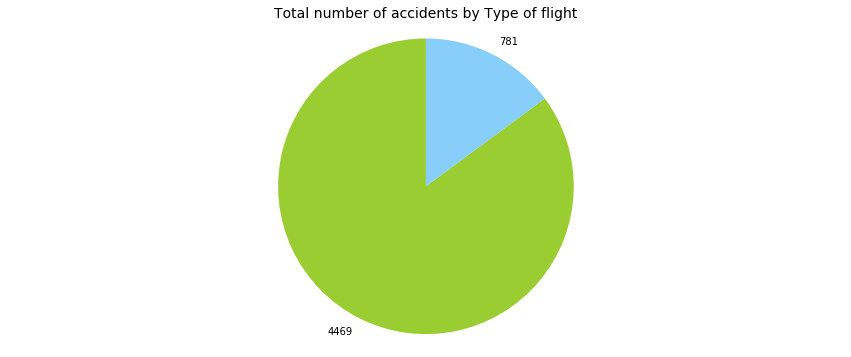

In [54]:
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))

plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)

plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

In [55]:
Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')

Temp2['Passenger'] = Temp2.Military == False

Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]

Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)

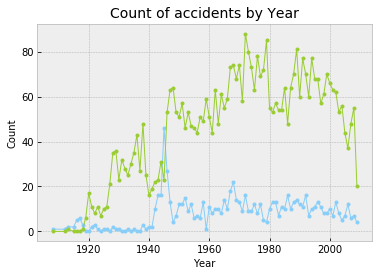

In [56]:
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

plt.show()

In [57]:
Fatalities.head(2)

NameError: name 'Fatalities' is not defined